In [6]:
"""Convert all the ruler data into calibration measurement, DISCARDED FOR ACCURATE VALUE FROM PRODUCT PAGE"""
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.image import imread

([<matplotlib.axis.XTick at 0x7ac34ef36a50>,
 [Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(300, 0, '300'),
  Text(400, 0, '400'),
  Text(500, 0, '500')])

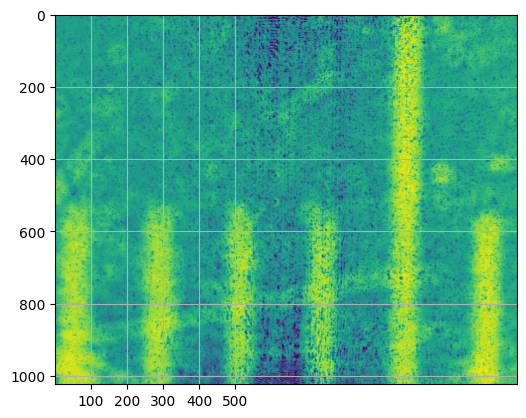

In [7]:
image = imread('Calibration/HCalibration.bmp')
plt.imshow(image)
plt.grid()
plt.xticks([100, 200, 300, 400, 500])

([<matplotlib.axis.YTick at 0x7ac358020440>,
 [Text(0, 100, '100'),
  Text(0, 200, '200'),
  Text(0, 300, '300'),
  Text(0, 400, '400'),
  Text(0, 500, '500')])

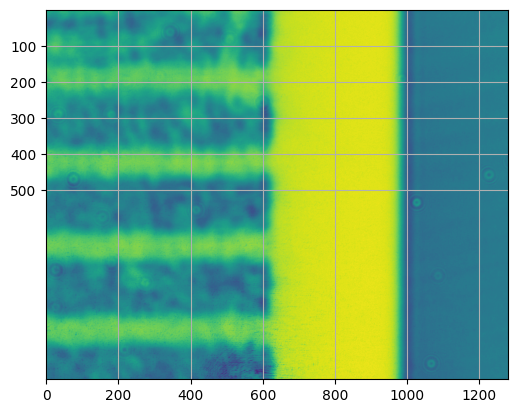

In [8]:
image = imread('Calibration/VCalibration.bmp')
plt.imshow(image)
plt.grid()
plt.yticks([100, 200, 300, 400, 500])

In [9]:
# random calculation
1280/1024

1.25

In [10]:
# random calculation
(510 - 280)/220

1.0454545454545454

In [11]:
# Horizontal Calibration Measurement for turns to mm

angle = 1800
uangle = 2 * np.sqrt(2)
mm = np.array([1.2, 0.8, 1.1, 1])
umm = np.array([0.5, 0.5, 0.5, 0.5])

In [12]:
cfactor = mm/angle
ucfactor = cfactor * np.sqrt((uangle/angle)**2 + (umm/mm)**2)

print(f"Calibration factor for each is {cfactor} +- {ucfactor}")

Calibration factor for each is [0.00066667 0.00044444 0.00061111 0.00055556] +- [0.00027778 0.00027778 0.00027778 0.00027778]


In [13]:
# rear top, rear left, front top, front left

# pg 61
angles = [56, 65, 86, 79]
uangles = 2*np.sqrt(2)

converted = cfactor * angles
uconverted = converted * np.sqrt((ucfactor/cfactor)**2 + (uangles/angles)**2)

print(converted, uconverted)

[0.03733333 0.02888889 0.05255556 0.04388889] [0.01566953 0.01809932 0.02395148 0.02200074]


In [14]:
# rear top, rear left, front top, front left

# pg 26
angles = [14, 16, 20, 22]
uangles = 2*np.sqrt(2)

converted = cfactor * angles
uconverted = converted * np.sqrt((ucfactor/cfactor)**2 + (uangles/angles)**2)

print(converted, uconverted)

[0.00933333 0.00711111 0.01222222 0.01222222] [0.00432195 0.00461882 0.00581827 0.00630993]


In [15]:
# Calculation for divergence

W = np.array([149, 245])
uW = 7

L = np.array([6, 8]) * 25400
uL = 1/16 * 25400

In [16]:
theta = np.arctan(W/(2*L)) 
print(theta)

[0.00048885 0.00060285]


In [17]:
a = 2*L / (W**2 + 4*L**2)
b = 2*W / (W**2 + 4*L**2)
utheta = np.sqrt((a*uW)**2 + (uL*b)**2)

print(utheta)

[2.35236308e-05 1.78567147e-05]


In [18]:
thetaAvg = np.mean(theta)
uthetaAvg = np.sqrt((utheta[0])**2 + (utheta[1])**2)
print(thetaAvg)
print(uthetaAvg)

0.0005458496815467388
2.9533429607695084e-05


In [19]:
# For beam waist calculation

L = 44.7e-2  # m cavity
uL = 0.1e-2
k = 632.8e-9  #wavelength m
pi = np.pi

g = 0.255
ug = 0.002

w2 = L * k / pi * np.sqrt(1/(g*(1-g)))

w= w2**0.5
print(w)


0.00045450424850307716


In [20]:
first = np.sqrt(L*k) * (2*g - 1)
first/= 4 * np.sqrt(pi) * (1/(g*(1-g)))**0.75 * (g-1)**2 * g*2

second = (1/(g*(1-g)))**0.25 * k
second /= 2 * np.sqrt(pi) * np.sqrt(L*k)

uw = np.sqrt((first*ug)**2 + (second*uL)**2)

print(uw)

5.138575992074578e-07


In [21]:
# Final M^2

M2 = pi * w * thetaAvg / k
print(M2)

1.231670134078321


In [22]:
uM2 = M2 * np.sqrt((uw/w)**2 + (uthetaAvg/thetaAvg)**2)
print(uM2)

0.06665458483759441


In [23]:
4.8*200 / 1e3  # random calculation

0.96